In [1]:
## Import pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.7.1'

# Data

In [3]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend()
    plt.show()

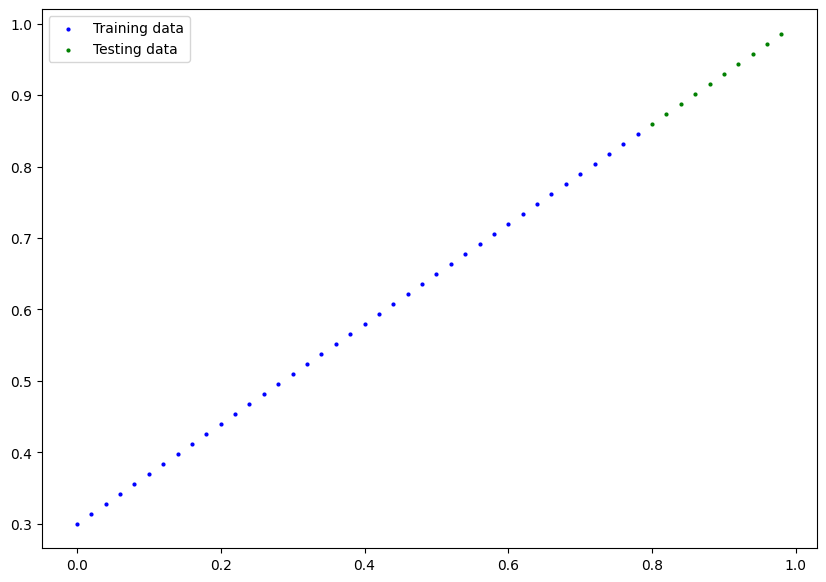

In [6]:
plot_predictions()

In [17]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

In [32]:
model_0 = LinearRegressionModel()

In [33]:
model_0.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]])),
             ('linear.bias', tensor([0.8300]))])

In [34]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [35]:
torch.manual_seed(42)

epochs = 120
for epoch in range(epochs):
    model_0.train()
    
    y_pred = model_0(X_train)
    
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        y_test_pred = model_0(X_test)
        test_loss = loss_fn(y_test_pred, y_test)
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.55518 | Test Loss: 0.57398
Epoch: 10 | Loss: 0.43997 | Test Loss: 0.43927
Epoch: 20 | Loss: 0.32476 | Test Loss: 0.30456
Epoch: 30 | Loss: 0.20955 | Test Loss: 0.16985
Epoch: 40 | Loss: 0.09434 | Test Loss: 0.03514
Epoch: 50 | Loss: 0.02389 | Test Loss: 0.04785
Epoch: 60 | Loss: 0.01996 | Test Loss: 0.04580
Epoch: 70 | Loss: 0.01652 | Test Loss: 0.03753
Epoch: 80 | Loss: 0.01309 | Test Loss: 0.02994
Epoch: 90 | Loss: 0.00965 | Test Loss: 0.02167
Epoch: 100 | Loss: 0.00622 | Test Loss: 0.01409
Epoch: 110 | Loss: 0.00279 | Test Loss: 0.00581


In [36]:
model_0.state_dict()

OrderedDict([('linear.weight', tensor([[0.6968]])),
             ('linear.bias', tensor([0.3025]))])

In [37]:
model_0.eval()
with torch.inference_mode():
    y_test_pred = model_0(X_test)
y_test_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

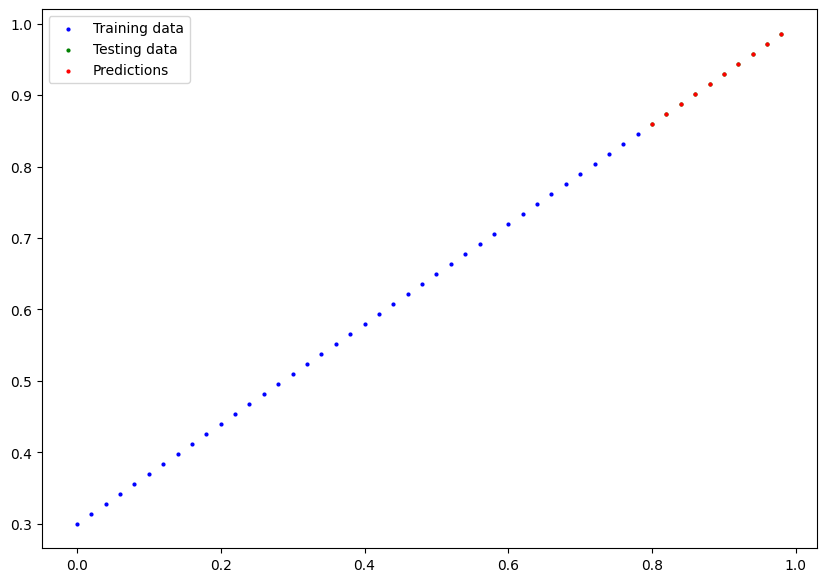

In [38]:
plot_predictions(predictions=y_test_pred)

In [39]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "00_pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [40]:
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [41]:
load_model_0 = LinearRegressionModel()
load_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [42]:
load_model_0

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

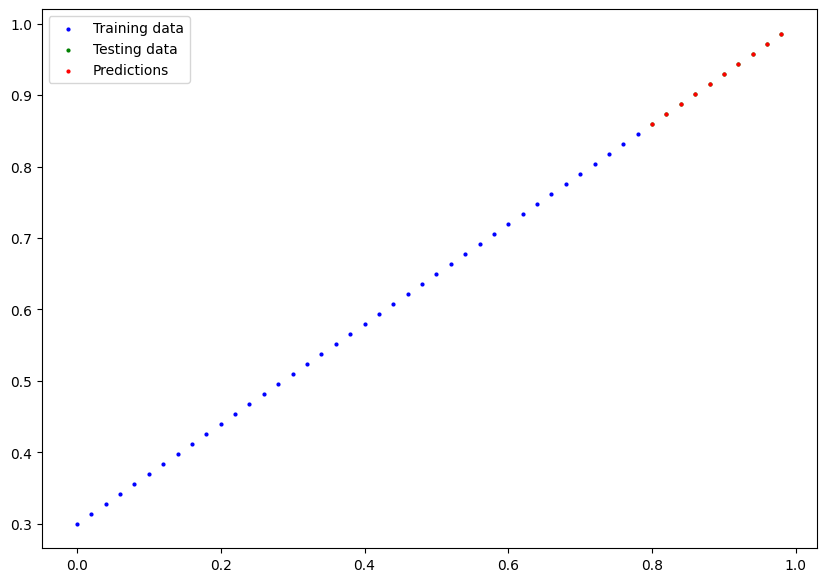

In [44]:
load_model_0.eval()
with torch.inference_mode():
    y_load_pred = load_model_0(X_test)
plot_predictions(predictions=y_load_pred)

In [45]:
y_test_pred == y_load_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])